## Getting Started with Networkx

NetworkX documentation: https://networkx.github.io/documentation/latest/

In [1]:
import networkx as nx

g = nx.Graph()
g

In [ ]:
print g.nodes()
print g.edges()

In [ ]:
g.add_node(1)
g.add_nodes_from([2,3])
print g.nodes()

In [ ]:
g.add_nodes_from(range(4,11,1))
print g.nodes()

A node can be any hashable object (immutable), such as strings, numbers, files, functions and more. 

In [ ]:
g2 = nx.Graph()
import numpy as np

g2.add_node(np.mean)
g2.add_node('x')
g2.nodes()

Now let's add edges

In [ ]:
g.add_edge(1,2)

In [ ]:
print g.edge[1]
print g.edge[2]

In [ ]:
g.add_edges_from([(2,3),(3,4)])
for i in range(4,10,1):
    g.add_edge(i,i+1)
g.edges()

In [ ]:
print 'nodes:',g.number_of_nodes()
print 'edges:',g.number_of_edges()

We can annotate nodes and edges with attributes

In [ ]:
g[1][2]['weight'] = 1.0
g[1][2]

In [ ]:
for i in range(2,10,1):
    g[i][i+1]['weight'] = i*1.0

# shows all edges + attributes (same as running g[1])
print 'edge info:',g.edge[1]
print 'node info:',g.node[1]

In [ ]:
g.node[1]['name']='one'
print 'node info:',g.node[1]

And it is easy to iterate over the nodes and edges of a graph

In [ ]:
# naming every node in the graph
names = ['one','two','three','four','five','six','seven','eight','nine','ten']
for node in g.nodes():
    g.node[node]['name'] = names[node-1]

In [ ]:
# print all edge weights
for u,v in g.edges():
    print g.node[u]['name'],v, g[u][v]['weight']

In [ ]:
# find neighbors of a particular node
for node in g.nodes():
    print node, g.neighbors(node)

## Class Graph

In [2]:
# handy library that helps us get all combinations of pairs, given an array of items
from itertools import combinations

arr = [1,2,3,4,5]
for i,j in combinations(arr,2):
    print i,j

1 2
1 3
1 4
1 5
2 3
2 4
2 5
3 4
3 5
4 5


In [3]:
g = nx.Graph()

floc = '/class/itpmssd/datasets/student_classes.txt'
f = open(floc)

for row in f:
    r = row.strip().split(',')
    class_name = r[0]
    class_students = r[1:]
    #print class_name, class_students
    
    # add nodes
    for student in class_students:
        g.add_node(student)
        
    # add edges
    for s1,s2 in combinations(class_students,2):
        g.add_edge(s1,s2)

In [4]:
# all our nodes
print g.nodes(), len(g.nodes())

['Ainsley', 'Shaun', 'Eli', 'Jason', 'Song', 'Lutfiadi', 'Hugo', 'Zhen', 'Denny', 'Jin Woo', 'Kat', 'Ashley', 'Paul', 'Caroline', 'Shan', 'Maria'] 16


In [5]:
# all our edges
print g.edges()

[('Ainsley', 'Jin Woo'), ('Ainsley', 'Paul'), ('Ainsley', 'Maria'), ('Shaun', 'Paul'), ('Shaun', 'Eli'), ('Shaun', 'Lutfiadi'), ('Shaun', 'Zhen'), ('Shaun', 'Denny'), ('Eli', 'Kat'), ('Eli', 'Shan'), ('Eli', 'Denny'), ('Eli', 'Song'), ('Jason', 'Hugo'), ('Jason', 'Caroline'), ('Jason', 'Shan'), ('Jason', 'Zhen'), ('Jason', 'Kat'), ('Song', 'Ashley'), ('Song', 'Shan'), ('Song', 'Maria'), ('Song', 'Kat'), ('Lutfiadi', 'Kat'), ('Lutfiadi', 'Shan'), ('Lutfiadi', 'Denny'), ('Hugo', 'Caroline'), ('Zhen', 'Jin Woo'), ('Zhen', 'Shan'), ('Zhen', 'Kat'), ('Denny', 'Ashley'), ('Jin Woo', 'Kat'), ('Jin Woo', 'Paul'), ('Jin Woo', 'Caroline'), ('Jin Woo', 'Maria'), ('Kat', 'Shan'), ('Paul', 'Caroline'), ('Paul', 'Maria')]


Populating the interactive namespace from numpy and matplotlib


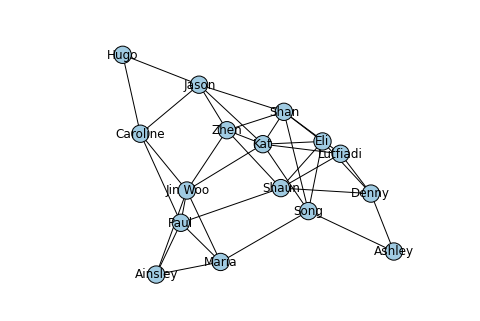

In [7]:
%pylab inline
nx.draw(g, node_color='#A0CBE2', with_labels=True)

### Centrality Measures

Documentation of various centrality measures here - https://networkx.github.io/documentation/latest/reference/algorithms.centrality.html

In [8]:
nx.degree(g)

{'Ainsley': 3,
 'Ashley': 2,
 'Caroline': 4,
 'Denny': 4,
 'Eli': 5,
 'Hugo': 2,
 'Jason': 5,
 'Jin Woo': 6,
 'Kat': 7,
 'Lutfiadi': 4,
 'Maria': 4,
 'Paul': 5,
 'Shan': 6,
 'Shaun': 5,
 'Song': 5,
 'Zhen': 5}

In [9]:
# list of frequency of each degree value
y = nx.degree_histogram(g)
y

[0, 0, 2, 1, 4, 6, 2, 1]

In [10]:
# needed to plot the histogram -> effectively number of "buckets"
x = range(len(nx.degree_histogram(g)))
x

[0, 1, 2, 3, 4, 5, 6, 7]

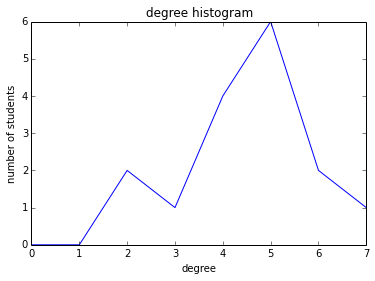

In [11]:
plot(x,y)
title('degree histogram')
ylabel('number of students')
xlabel('degree')

In [12]:
# degree centrality for node v is the fraction of nodes it is connected to
deg = nx.degree_centrality(g)
deg

{'Ainsley': 0.2,
 'Ashley': 0.13333333333333333,
 'Caroline': 0.26666666666666666,
 'Denny': 0.26666666666666666,
 'Eli': 0.3333333333333333,
 'Hugo': 0.13333333333333333,
 'Jason': 0.3333333333333333,
 'Jin Woo': 0.4,
 'Kat': 0.4666666666666667,
 'Lutfiadi': 0.26666666666666666,
 'Maria': 0.26666666666666666,
 'Paul': 0.3333333333333333,
 'Shan': 0.4,
 'Shaun': 0.3333333333333333,
 'Song': 0.3333333333333333,
 'Zhen': 0.3333333333333333}

In [13]:
# top 10 most central students
sorted(deg.items(), key=lambda x:-x[1])[:10]

[('Kat', 0.4666666666666667),
 ('Jin Woo', 0.4),
 ('Shan', 0.4),
 ('Shaun', 0.3333333333333333),
 ('Eli', 0.3333333333333333),
 ('Song', 0.3333333333333333),
 ('Zhen', 0.3333333333333333),
 ('Jason', 0.3333333333333333),
 ('Paul', 0.3333333333333333),
 ('Lutfiadi', 0.26666666666666666)]

In [14]:
# betweenness centrality is equal to the number of shortest paths from all vertices to all others 
# that pass through that node. A node with high betweenness centrality has a large influence on the transfer
# of items through the network, under the assumption that item transfer follows the shortest paths.

betweenness = nx.betweenness_centrality(g)
print betweenness

{'Ainsley': 0.0, 'Shaun': 0.1123356009070295, 'Eli': 0.04405895691609978, 'Lutfiadi': 0.02659863945578232, 'Maria': 0.05755102040816327, 'Song': 0.13628117913832202, 'Hugo': 0.0, 'Zhen': 0.04907029478458051, 'Ashley': 0.007936507936507936, 'Jin Woo': 0.11922902494331068, 'Kat': 0.1470748299319728, 'Jason': 0.116281179138322, 'Paul': 0.10746031746031745, 'Denny': 0.03571428571428572, 'Shan': 0.07873015873015873, 'Caroline': 0.06643990929705215}


In [15]:
sorted(betweenness.items(), key=lambda x:-x[1])[:10]

[('Kat', 0.1470748299319728),
 ('Song', 0.13628117913832202),
 ('Jin Woo', 0.11922902494331068),
 ('Jason', 0.116281179138322),
 ('Shaun', 0.1123356009070295),
 ('Paul', 0.10746031746031745),
 ('Shan', 0.07873015873015873),
 ('Caroline', 0.06643990929705215),
 ('Maria', 0.05755102040816327),
 ('Zhen', 0.04907029478458051)]

### Graph Properties

In [17]:
print("radius: %d" % nx.radius(g)) # min graph eccentricity 
print("diameter: %d" % nx.diameter(g)) # longest shortest path
print("eccentricity: %s" % nx.eccentricity(g)) # max graph distance between node and other vertex of the graph
print("center: %s" % nx.center(g)) # max degree
print("periphery: %s" % nx.periphery(g)) # subgraph induced by vertices that have graph eccentricities equal to the graph diameter
print("density: %s" % nx.density(g)) # number of edges is close to the maximal number of edges

radius: 2
diameter: 4
eccentricity: {'Ainsley': 3, 'Shaun': 3, 'Eli': 3, 'Lutfiadi': 3, 'Maria': 3, 'Song': 3, 'Hugo': 4, 'Zhen': 3, 'Ashley': 4, 'Jin Woo': 3, 'Kat': 2, 'Jason': 3, 'Paul': 3, 'Denny': 4, 'Shan': 3, 'Caroline': 4}
center: ['Kat']
periphery: ['Hugo', 'Ashley', 'Denny', 'Caroline']
density: 0.3


## Assignment

1. Take a look at the series of code blocks below. The same action is taken on our class graph over a number of iterations. Explain in 1-2 paragraphs what's going on here.

2. Describe what happens in the end. Do you have an explanation for why this would happen to the graph? What's the significance? (1-2 paragraphs)

In [18]:
# Betweenness Centrality -> what is this calculating?

eb = nx.edge_betweenness_centrality(g)
eb_il = eb.items()
eb_il.sort(key=lambda x: x[1], reverse=True)
print eb_il[0][0]

('Shaun', 'Paul')


36


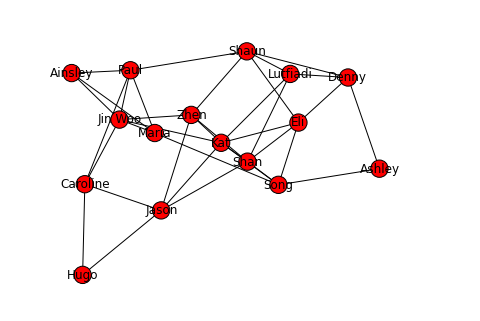

In [19]:
# Calculating positioning of nodes, so that we can plot the next graphs in exactly the same place

pos=nx.spring_layout(g)
nx.draw(g, pos, with_labels=True) 
print g.number_of_edges()

35


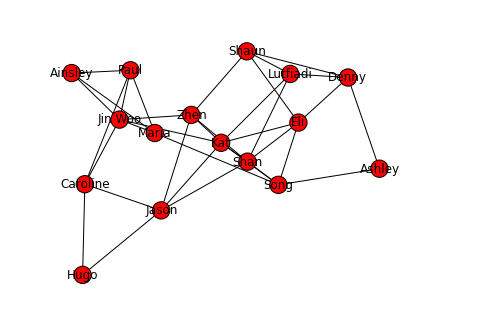

In [20]:
g.remove_edge('Shaun', 'Paul')
nx.draw(g, pos, with_labels=True)
print g.number_of_edges()

34


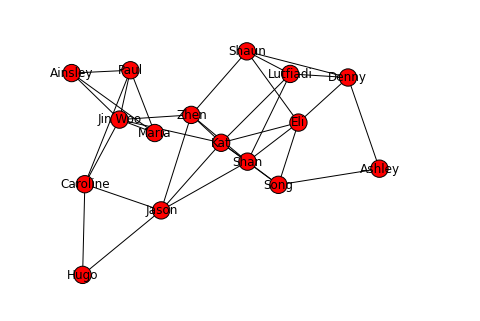

In [21]:
eb = nx.edge_betweenness_centrality(g)
eb_il = eb.items()
eb_il.sort(key=lambda x: x[1], reverse=True)
n1,n2 = eb_il[0][0]
g.remove_edge(n1,n2)
nx.draw(g, pos, with_labels=True)
print g.number_of_edges()

33


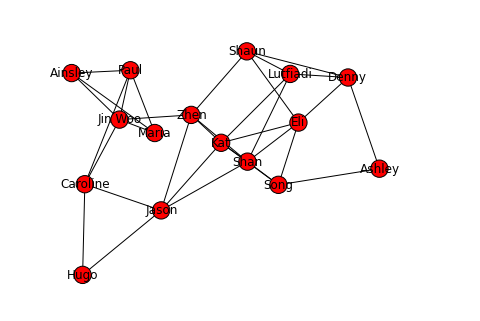

In [22]:
eb = nx.edge_betweenness_centrality(g)
eb_il = eb.items()
eb_il.sort(key=lambda x: x[1], reverse=True)
n1,n2 = eb_il[0][0]
g.remove_edge(n1,n2)
nx.draw(g, pos, with_labels=True)
print g.number_of_edges()

32


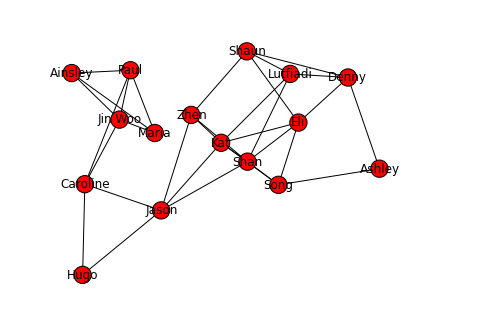

In [23]:
eb = nx.edge_betweenness_centrality(g)
eb_il = eb.items()
eb_il.sort(key=lambda x: x[1], reverse=True)
n1,n2 = eb_il[0][0]
g.remove_edge(n1,n2)
nx.draw(g, pos, with_labels=True)
print g.number_of_edges()

31


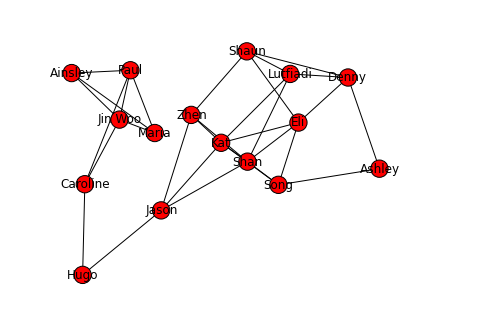

In [24]:
eb = nx.edge_betweenness_centrality(g)
eb_il = eb.items()
eb_il.sort(key=lambda x: x[1], reverse=True)
n1,n2 = eb_il[0][0]
g.remove_edge(n1,n2)
nx.draw(g, pos, with_labels=True)
print g.number_of_edges()

30


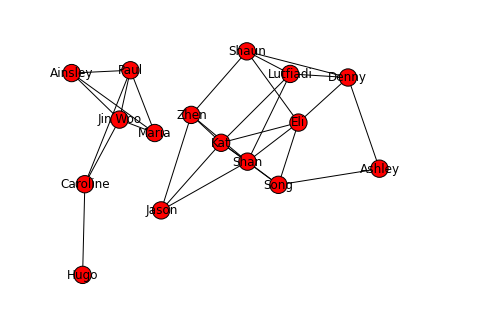

In [25]:
eb = nx.edge_betweenness_centrality(g)
eb_il = eb.items()
eb_il.sort(key=lambda x: x[1], reverse=True)
n1,n2 = eb_il[0][0]
g.remove_edge(n1,n2)
nx.draw(g, pos, with_labels=True)
print g.number_of_edges()

In [26]:
components = sorted(nx.connected_component_subgraphs(g), key=len, reverse=True)

In [27]:
for c in components:
    print c.number_of_nodes()

10
6


### For your reference: other graph analysis tools implemented in networkx